In [1]:
# 练习处理缺失数据，统计与计算
import pandas as pd
import numpy as np
dict_data = pd.DataFrame([np.random.randn(3), [1., 2., np.nan],
                       [np.nan, 4., np.nan], [1., 2., 3.]])# 创建数据
print(dict_data.head())


          0         1         2
0  0.299153 -0.598495  0.699337
1  1.000000  2.000000       NaN
2       NaN  4.000000       NaN
3  1.000000  2.000000  3.000000


In [4]:
dict_data.iloc[2, 0]# 访问第3行，第一列

np.float64(nan)

In [5]:
print(dict_data.isnull()) # 检测缺失数据

       0      1      2
0  False  False  False
1  False  False   True
2   True  False   True
3  False  False  False


In [7]:
print(dict_data.isnull().sum()/len(dict_data))# 计算缺失数据的比例

0    0.25
1    0.00
2    0.50
dtype: float64


In [8]:
#统计与计算
num1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])# 创建多层索引
num1_obj = pd.Series(np.random.randn(12), index=num1) # 创建Series
num2_obj = num1_obj.unstack(0) # 转换多层索引
print(num2_obj)
num2_obj.loc[0, 'a'] = np.nan # 添加缺失数据
print(num2_obj)
print(num2_obj.min(axis=1)) # 计算每列的最小值

cloth         a         b         c         d
size                                         
0      0.757744 -0.143647 -0.706950  1.041278
1     -2.466132 -0.671689 -1.486478 -1.272927
2      0.536452 -0.077258  0.253580 -0.098295
cloth         a         b         c         d
size                                         
0           NaN -0.143647 -0.706950  1.041278
1     -2.466132 -0.671689 -1.486478 -1.272927
2      0.536452 -0.077258  0.253580 -0.098295
size
0   -0.706950
1   -2.466132
2   -0.098295
dtype: float64


In [9]:
num2_obj# 访问多层索引

cloth         a         b         c         d
size                                         
0           NaN -0.143647 -0.706950  1.041278
1     -2.466132 -0.671689 -1.486478 -1.272927
2      0.536452 -0.077258  0.253580 -0.098295

In [10]:
print(num2_obj.describe())# 统计数据

              0         1         2
count  3.000000  4.000000  2.000000
mean   0.766384  1.850376  1.849668
std    0.404634  1.885261  1.626814
min    0.299153 -0.598495  0.699337
25%    0.649577  1.350376  1.274503
50%    1.000000  2.000000  1.849668
75%    1.000000  2.500000  2.424834
max    1.000000  4.000000  3.000000


In [19]:
num2_obj.loc[:,'b']# 访问多层索引的某一列

size
0   -0.143647
1   -0.671689
2   -0.077258
Name: b, dtype: float64

In [20]:
print(num2_obj.loc[:,'b'].argmin())# 计算最小值的索引

1


In [21]:
num2_obj

cloth         a         b         c         d
size                                         
0           NaN -0.143647 -0.706950  1.041278
1     -2.466132 -0.671689 -1.486478 -1.272927
2      0.536452 -0.077258  0.253580 -0.098295

In [22]:
num2_obj.idxmin(axis = 0,skipna = True)# 计算最小值的索引

cloth
a    1
b    1
c    1
d    1
dtype: int64

In [24]:
from matplotlib import pyplot as plt
file_path = "IMDB-Movie-Data.csv"# 导入数据
df = pd.read_csv(file_path)# 创建DataFrame
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0  
3     7.2   60545              270.32       59.0  
4     6.2  393727              325.02       40.0

In [25]:
df.describe()# 统计数据

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000   47.000000  
50%             47.985000   59.500000  
75%            113.715000   72.000000  
max            936.630000  100.000000

In [26]:
print(len(set(df['Director'].tolist())))# 统计导演的数量
print(len(df["Director"].unique()))# 统计导演的数量

644
644


In [27]:
temp_actors_list = df["Actors"].str.split(", ").tolist()# 提取演员列表
print(temp_actors_list)

[['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana'], ['Noomi Rapace', 'Logan Marshall-Green', 'Michael Fassbender', 'Charlize Theron'], ['James McAvoy', 'Anya Taylor-Joy', 'Haley Lu Richardson', 'Jessica Sula'], ['Matthew McConaughey,Reese Witherspoon', 'Seth MacFarlane', 'Scarlett Johansson'], ['Will Smith', 'Jared Leto', 'Margot Robbie', 'Viola Davis'], ['Matt Damon', 'Tian Jing', 'Willem Dafoe', 'Andy Lau'], ['Ryan Gosling', 'Emma Stone', 'Rosemarie DeWitt', 'J.K. Simmons'], ['Essie Davis', 'Andrea Riseborough', 'Julian Barratt,Kenneth Branagh'], ['Charlie Hunnam', 'Robert Pattinson', 'Sienna Miller', 'Tom Holland'], ['Jennifer Lawrence', 'Chris Pratt', 'Michael Sheen,Laurence Fishburne'], ['Eddie Redmayne', 'Katherine Waterston', 'Alison Sudol,Dan Fogler'], ['Taraji P. Henson', 'Octavia Spencer', 'Janelle Monáe,Kevin Costner'], ['Felicity Jones', 'Diego Luna', 'Alan Tudyk', 'Donnie Yen'], ["Auli'i Cravalho", 'Dwayne Johnson', 'Rachel House', 'Temuera Morrison'], ['Anne 

In [28]:
actors_list = [i for j in temp_actors_list for i in j]# 提取演员列表
actors_num = len(set(actors_list))# 统计演员的数量
print(actors_num)

2015


In [29]:
u,indices = np.unique(actors_list,return_counts = True)# 统计演员的数量
print (u)
indices# 统计演员的数量

['50 Cent' 'A.C. Peterson' 'AJ Michalka' ... 'Émilie Leclerc'
 'Ólafur Darri Ólafsson' 'Óscar Jaenada']


array([1, 1, 1, ..., 1, 1, 1], shape=(2015,))

66 191
125


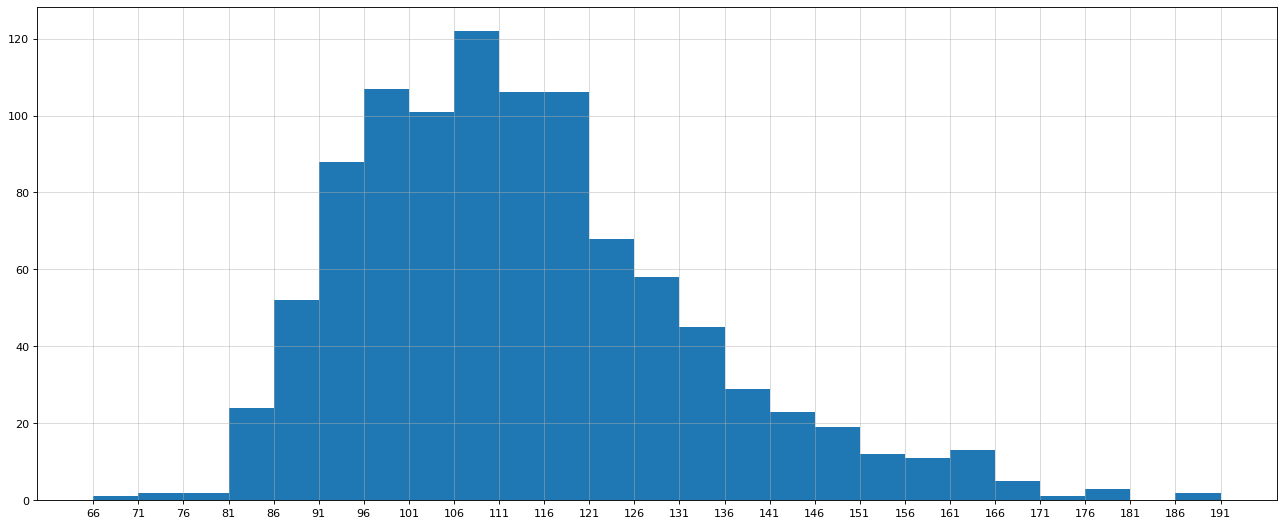

In [30]:
runtime_data = df["Runtime (Minutes)"].values# 提取运行时间数据

max_runtime = runtime_data.max()# 计算最大运行时间
min_runtime = runtime_data.min()# 计算最小运行时间
print(min_runtime,max_runtime)# 计算最大运行时间
# 计算组数
print(max_runtime - min_runtime)# 计算组数
num_bin = (max_runtime - min_runtime) // 5# 计算组数
plt.figure(figsize=(20, 8), dpi=80)# 创建画布
plt.hist(runtime_data, int(num_bin))# 绘制直方图
plt.grid(alpha=0.5) # 添加网格
plt.xticks(range(min_runtime, max_runtime + 5,5))# 设置x轴刻度
plt.show()# 显示图形